<a href="https://colab.research.google.com/github/shinjansarkar/Exploring-Fireducks/blob/main/Fireducks_vs_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##📦 Installing Required Libraries: Pandas & FireDucks via pip 💻✅

In [6]:
!pip install pandas
!pip install fireducks

##Enable Benchmark Mode (FireDucks Special):

In [1]:
FIREDUCKS_FLAGS = "--benchmark-mode"

##🔍 Performance Comparison: Reading Large CSV with Pandas vs FireDucks 🚀



In [1]:
import pandas as pd
import fireducks.pandas as fd
import time

# Create a large CSV (run only once)
df = pd.DataFrame({
    'A': range(1, 5_000_001),
    'B': range(5_000_001, 1, -1)
})
df.to_csv("bigfile.csv", index=False)

# --- Pandas Read ---
start = time.time()
df_pandas = pd.read_csv("bigfile.csv")
print("Pandas Read Time:", time.time() - start)

# --- FireDucks Read ---
start = time.time()
df_firedf = fd.read_csv("bigfile.csv")
print("FireDucks Read Time:", time.time() - start)


Pandas Read Time: 1.5021946430206299
FireDucks Read Time: 0.0494997501373291


##🔎 Complex Filtering & GroupBy: Pandas vs FireDucks Speed Test ⚡📊

In [2]:
# --- Pandas ---
start = time.time()
result_pandas = df_pandas[df_pandas['A'] % 5 == 0].groupby('B').mean()
print("Pandas Filter + GroupBy Time:", time.time() - start)

# --- FireDucks ---
start = time.time()
result_firedf = df_firedf[df_firedf['A'] % 5 == 0].groupby('B').mean()
print("FireDucks Filter + GroupBy Time:", time.time() - start)


Pandas Filter + GroupBy Time: 0.40189552307128906
FireDucks Filter + GroupBy Time: 0.002817869186401367


##🔗 Data Merging Benchmark: Pandas vs FireDucks 🚀🔄

In [3]:
df1 = pd.DataFrame({'id': range(1, 1_000_001), 'value1': range(1, 1_000_001)})
df2 = pd.DataFrame({'id': range(500_000, 1_500_000), 'value2': range(1, 1_000_001)})

fd1 = fd.from_pandas(df1)
fd2 = fd.from_pandas(df2)

# --- Pandas Merge ---
start = time.time()
merged_pandas = df1.merge(df2, on='id', how='inner')
print("Pandas Merge Time:", time.time() - start)

# --- FireDucks Merge ---
start = time.time()
merged_firedf = fd1.merge(fd2, on='id', how='inner')
print("FireDucks Merge Time:", time.time() - start)


Pandas Merge Time: 0.05016160011291504
FireDucks Merge Time: 0.0005049705505371094


##➕ Column Addition Performance: Pandas vs FireDucks ⚡🧮

In [4]:
# --- Pandas ---
start = time.time()
df_pandas['C'] = df_pandas['A'] + df_pandas['B']
print("Pandas Column Addition Time:", time.time() - start)

# --- FireDucks ---
start = time.time()
df_firedf['C'] = df_firedf['A'] + df_firedf['B']
print("FireDucks Column Addition Time:", time.time() - start)


Pandas Column Addition Time: 0.04266953468322754
FireDucks Column Addition Time: 0.0007185935974121094


##📊 Visual Performance Comparison: Pandas vs FireDucks (Bar Chart) 🚀

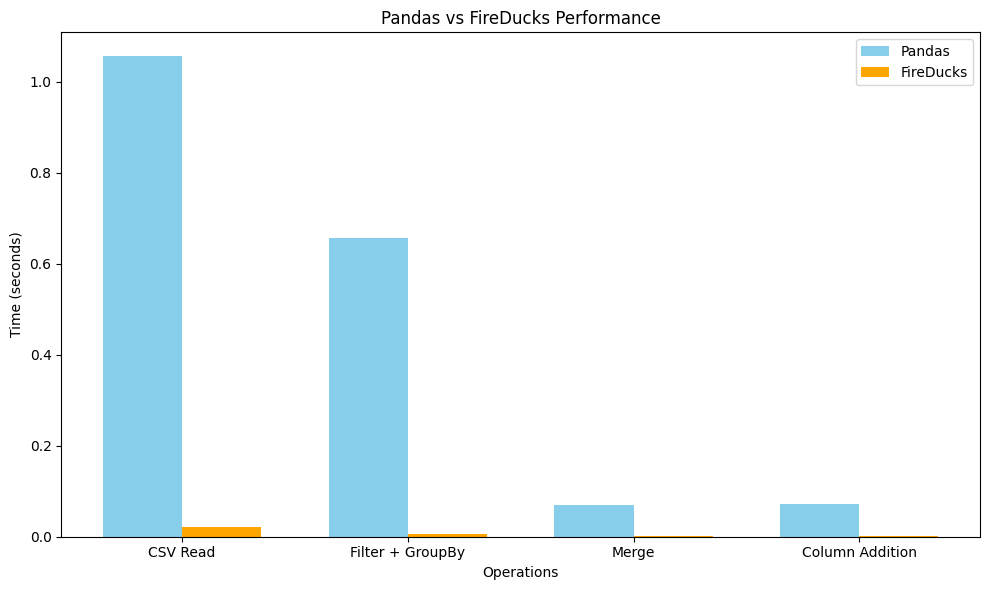

In [5]:
import matplotlib.pyplot as plt

# Operation names
operations = [
    "CSV Read",
    "Filter + GroupBy",
    "Merge",
    "Column Addition"
]

# Timings in seconds
pandas_times = [
    1.056403636932373,
    0.6559267044067383,
    0.06973576545715332,
    0.07230448722839355
]

fireducks_times = [
    0.022218704223632812,
    0.004991292953491211,
    0.0005903244018554688,
    0.0011932849884033203
]

# Bar chart setup
x = range(len(operations))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, pandas_times, width=bar_width, label='Pandas', color='skyblue')
plt.bar([i + bar_width for i in x], fireducks_times, width=bar_width, label='FireDucks', color='orange')
plt.xlabel('Operations')
plt.ylabel('Time (seconds)')
plt.title('Pandas vs FireDucks Performance')
plt.xticks([i + bar_width / 2 for i in x], operations)
plt.legend()
plt.tight_layout()
plt.show()
